In [6]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False

# 元素反应
元素反应过于复杂,同时受到多个参与反应的角色数据、敌人数据、环境数据的影响  
- 增幅反应(Amplifying): 元素之间反应对伤害进行增幅，如**蒸发**、**融化**
- 聚变反应(Transformative): 元素之间反应造成额外效果(大部分会产生额外伤害,有些并没有伤害但有额外效果如冻结、结晶)，如**超导**、**超载**、**感电**、**冻结/碎冰**、**绽放**、**激化**

## 增幅反应
增幅造成反应的伤害(加成原伤害)

### 增幅后的伤害
$$增幅后的伤害 = 原伤害 * (1 + 增幅加成) * 抗性系数$$

### 增幅加成
$$增幅加成 = 类型系数 + \frac{2.78 * 精通}{1400 + 精通}$$
类型系数
- 水元素触发蒸发/火元素触发融化: 1
- 火元素触发蒸发/冰元素触发融化: 0.5

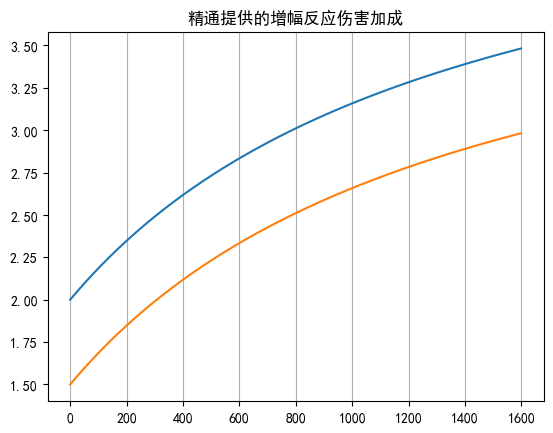

In [7]:
em = np.arange(0, 1600)
plt.plot(em, 2 + (2.78 * em)/(1400 + em))
plt.plot(em, 1.5 + (2.78 * em)/(1400 + em))
plt.grid(axis='x')
plt.title('精通提供的增幅反应伤害加成')
plt.show()

**蒸发**、**融化**永远的神，即使在没有精通的情况下依然可以造成1.5或2倍的伤害

## 聚变反应
造成额外伤害(与角色的普通伤害、战技、元素爆发伤害无关)，与一个固定的基础伤害有关。角色等级和反应类型会影响其伤害，此外角色的精通和各种奇怪的方式(角色天赋,副本BUFF等)提供反应伤害加成，对不同敌人也有不同的元素抗性(反应会造成元素伤害)，甚至还有额外的收益(如草神命座2可以使绽放反应暴击)。伤害会造成元素或物理伤害,会受抗性影响

### 伤害计算
$$聚变反应伤害 = 反应基础伤害 * 等级系数 * 反应基础倍率 * 反应伤害提升系数 * 额外收益 * 抗性系数$$

反应基础伤害、等级系数、反应基础倍率可看下图:
![聚变反应基础伤害](../asset/image/genshin/transformative_reaction_base_damage.png)  

### 超导、扩散、碎冰、超载、感电、燃烧、绽放、超绽放、烈绽放
精通以上反应既有相同的加成
$$\frac{16*精通}{2000+精通}$$

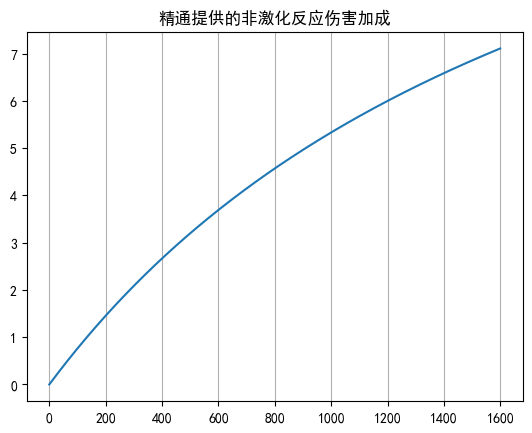

In [8]:
em = np.arange(0, 1600)
plt.plot(em, (16 * em)/(2000 + em))
plt.grid(axis='x')
plt.title('精通提供的非激化反应伤害加成')
plt.show()

### 超激化、蔓激化
雷+草会触发激化反应使怪进入激化状态(附加隐藏的激化元素),当激化元素再与雷或草元素反应,就会触发超激化或蔓激化
#### 反应基础倍率  
- 超激化`1.15`  
- 蔓激化`1.25`  
#### 精通加成  
$$\frac{5*精通}{1200+精通}$$

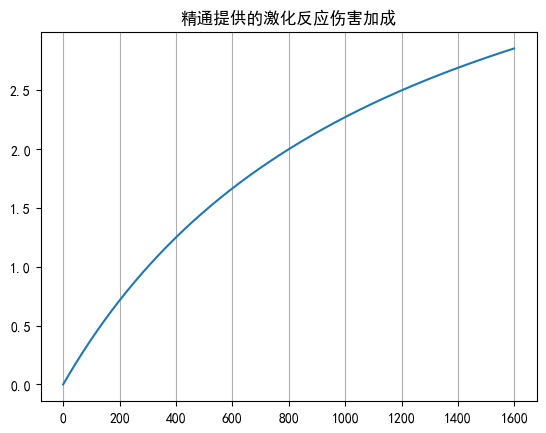

In [9]:
em = np.arange(0, 1600)
plt.plot(em, (5 * em)/(1200 + em))
plt.grid(axis='x')
plt.title('精通提供的激化反应伤害加成')
plt.show()

### 伤害收益
1000精通将带来`533.33%`的反应伤害加成
对于10%抗性(大部分怪物抗性)的敌人仅能造成`90%`的伤害

In [10]:
def simpleTR1Damange(r, em):
    return 1446.85 * r * (1 + (16 * em)/(2000 + em)) * 0.9


def simpleTR2Damange(r, em):
    return 1446.85 * r * (1 + (5 * em)/(1200 + em)) * 0.9


trRates = (
    ('超导', 0.5),
    ('扩散', 0.6),
    ('碎冰', 1.5),
    ('超载', 2),
    ('感电', 1.2),
    ('燃烧(0.26s)', 0.25),
    ('绽放', 2),
    ('超/烈绽放', 3),
    ('超激化', 1.15),
    ('蔓激化', 1.25)
)
transformativeDamangeTable = []
for rate in trRates[:-2]:
    transformativeDamangeTable.append((
        rate[0],
        simpleTR1Damange(rate[1], 1000)
    ))
for rate in trRates[-2:]:
    transformativeDamangeTable.append((
        rate[0],
        simpleTR2Damange(rate[1], 1000)
    ))

print(tabulate(transformativeDamangeTable, headers=[
      '反应类型', '1000精通(无反应伤害加成)伤害'], floatfmt='.2f', tablefmt='github'))

| 反应类型    |   1000精通(无反应伤害加成)伤害 |
|-------------|--------------------------------|
| 超导        |                        4123.52 |
| 扩散        |                        4948.23 |
| 碎冰        |                       12370.57 |
| 超载        |                       16494.09 |
| 感电        |                        9896.45 |
| 燃烧(0.26s) |                        2061.76 |
| 绽放        |                       16494.09 |
| 超/烈绽放   |                       24741.13 |
| 超激化      |                        4900.88 |
| 蔓激化      |                        5327.04 |


由于聚变反应基于一个固定的伤害数值，角色属性(忽略等级)中仅有精通可以对聚变反应伤害加成造成影响，而提升精通必然要牺牲攻击加成、暴击爆伤等影响技能伤害的属性。除去草系绽放外，其他反应很难比得过增幅反应。但在3.0版本引入草系之后，绽放、超/烈绽放反应不但有更高的反应基础系数，草系角色天赋、圣遗物、元素共鸣也给反应带来更多的加成和抗性缩减，高效的产种方式也使得反应触发次数大幅提高。

### 结晶反应
水火雷草冰与岩元素反应会生成一个对应元素的结晶、拾取结晶生成一个对应元素的护盾。

#### 护盾值
$$ 护盾值 = 反应基础数值 * 等级系数 * (1 + \frac{4.44 * 精通}{1400 + 精通})$$

护盾对同属性伤害有`250%`的吸收量加成，护盾强效也会影响。